In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

os.chdir('/Users/christianhenry/Dropbox/PostDoc/Data Incubator/DI_12Day/Day4')

#source the Day4 script to access processed data
%run Day4.ipynb

FEDERAL EXPRESS                     12
JetBlue Airways, Corp.              10
MEDITERRANEAN GYRO PRODUCTS         10
Montefiore Medical Center           10
Magellan Aerospace New York, Inc     9
                                    ..
D.C. CENTER CORP                     1
HELLMAN ELECTRIC CORP.               1
Halach Gold, Inc.                    1
H. FOX & CO., INC.                   1
WPC LLC                              1
Name: Company Name, Length: 787, dtype: int64
1196.0
gmail.com              150
aol.com                145
verizon.net             20
yahoo.com               19
hotmail.com             14
                      ... 
sahadifinefoods.com      1
sequins.com              1
attglobal.net            1
solco.com                1
worksmfg.com             1
Name: domain, Length: 591, dtype: int64


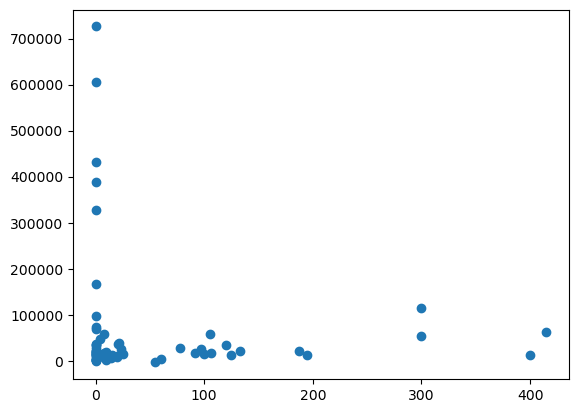

/Users/christianhenry/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


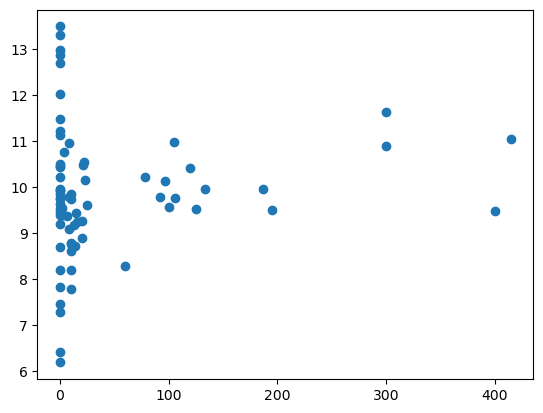

In [2]:
#scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

#create two separate dataframes for each variable then join based on NTA
mean_savings_df = mean_savings.to_frame()

jobs_created_df = jobs_created.to_frame()

join = mean_savings_df.join(jobs_created_df)


x = join["Job created"]
y = join["Total Savings"]

#Standard
plt.scatter(x, y)
plt.show()

#Logged savings; Transform data
y_log = np.log(y+1)

plt.scatter(x, y_log)
plt.show()

In [ ]:
#theres a negative number in the data yeilding an error so lets print a csv, check for the negative value and use it as a constant to be applied across the set
 
filepath = Path('/Users/christianhenry/Dropbox/PostDoc/Data Incubator/DI_12Day/Day4/out.csv')
y.to_csv(filepath)

#re-plot based on -3744 value, looks funny.. maybe consider removing the value?
y_log = np.log(y+3745)

plt.scatter(x, y_log)
plt.show()

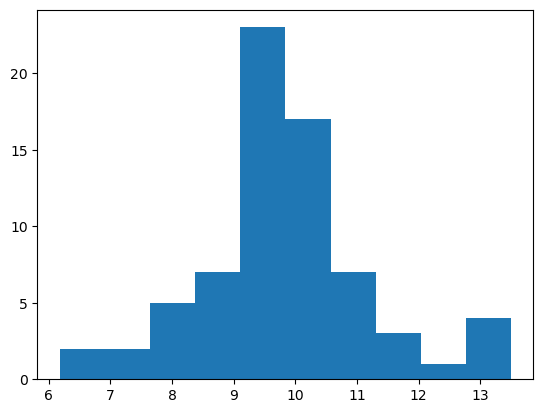

In [3]:
#histogram of the log of the average total savings.
plt.hist(y_log)
plt.show()

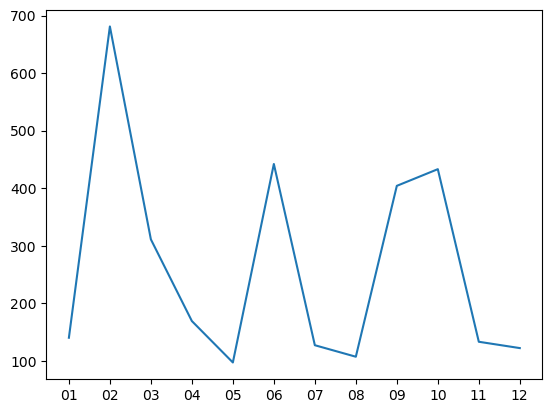

In [4]:
#line plot of the total jobs created for each month.

#only keep numbers representing month in the column
data_q3['Effective Date'] = data_q3['Effective Date'].str[:2]
#subset the data
d5_data = data_q3[['Effective Date', 'Job created']]
#Drop rows with NANs
d5_data = d5_data.dropna()
#Group by date; month
d5_data = d5_data.groupby(by=["Effective Date"]).sum()
#Reset index to correctly call column/data
d5_data = d5_data.reset_index(drop=False)

#assign x and y
x = d5_data['Effective Date']
y = d5_data['Job created']

plt.plot(x,y)